In [1]:
!pip install graphviz pydotplus
!pip install graphviz

In [2]:
from pandas import read_csv
import numpy as np
import pandas as pd
from pandas import merge
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import pathlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.initializers import Zeros, RandomNormal, glorot_uniform
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image

In [3]:
#Código para cargar el Dataset
url = 'https://raw.githubusercontent.com/brubiog/TIA/main/dataset.csv'
dataset_completo = read_csv(url,sep=";")

In [4]:
#Veamos las filas y columnas del dataset
dataset_completo.shape

(4424, 37)

In [5]:
#Veamos qué tipo de información contiene
dataset_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Marital status                                  4424 non-null   int64 
 1   Application mode                                4424 non-null   int64 
 2   Application order                               4424 non-null   int64 
 3   Course                                          4424 non-null   int64 
 4   Daytime/evening attendance	                     4424 non-null   int64 
 5   Previous qualification                          4424 non-null   int64 
 6   Previous qualification (grade)                  4424 non-null   object
 7   Nacionality                                     4424 non-null   int64 
 8   Mother's qualification                          4424 non-null   int64 
 9   Father's qualification                          4424

In [6]:
#Vamos a ver las clases de cada una de nuestras variables object
print(dataset_completo.groupby('Target').size())

Target
Dropout     1421
Enrolled     794
Graduate    2209
dtype: int64


In [7]:
print(dataset_completo.head(10))

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   
5               2                39                  1    9991   
6               1                 1                  1    9500   
7               1                18                  4    9254   
8               1                 1                  3    9238   
9               1                 1                  1    9238   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1      

In [8]:

#Transformamos los datos: convertimos las categorías a numéricas para poder modelar
#Clasificamos los matriculados como graduados
data_mapped = {"Target": {"Dropout":0.0, "Graduate":1.0, "Enrolled":1.0}}
dataset_completo=dataset_completo.replace(data_mapped)
for column in dataset_completo.columns:
    if dataset_completo[column].dtype == 'object':
        
        dataset_completo[column] =dataset_completo[column].str.replace(',', '.').astype(float)
        
print(dataset_completo)


      Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                                1             

In [9]:
#Vemos si hay nulos
dataset_completo.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [10]:
#Veamos si hay registros duplicados
duplicados = dataset_completo.duplicated()
numero_duplicados = duplicados.sum()
print("Número de registros duplicados:", numero_duplicados)

Número de registros duplicados: 0


In [11]:
#Calculamos los estadísticos más importantes
Stats = dataset_completo.describe()
Stats = Stats.transpose()
Stats

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.00,1.00,6.00
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.00,39.00,57.00
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.00,2.00,9.00
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.00,9556.00,9991.00
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.00,1.00,1.00
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.00,1.00,43.00
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.10,140.00,190.00
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.00,1.00,109.00
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.00,37.00,44.00
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.00,37.00,44.00


In [12]:
#Sin enrolled
# Eliminar las filas donde la columna 'Target' tiene el valor 'enrooled'
#dataset_cambiado = dataset_completo[dataset_completo['Target'] != 2]
#print(len(dataset_cambiado))

# En la variable X es todos los datos menos la variable objetivo, y la y es la variable objetivo
X = dataset_completo.drop(columns=['Target'])
y = dataset_completo['Target']



# Reemplazar comas por puntos en todas las columnas de características si son strings
X = X.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x).astype('float32')

# Convertir la variable objetivo a tipo entero
y = y.astype('int')
# División del conjuntos de entrenamiento y validación
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)


#Normalizamos los datos de entrenamiento de las variables de entrada
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_validation1 = scaler.transform(X_validation)

#Comprobamos la longitud de cada variable train y test
print(len(X_train),len(X_validation))
#Algoritmo CART
#Cargamos el modelo
model=DecisionTreeClassifier(random_state=0,max_depth=4,criterion='gini')
#Entrenamos con los datos de entrenamiento
history1=model.fit(X_train1,Y_train)
#Realizamos prediciones con el dataset de validacion
predictions=model.predict(X_validation1)
#Preciosion obtenida para el modelo de CART
precision=accuracy_score(Y_validation,predictions)
print(precision)

3539 885
0.8689265536723164


In [13]:
print(classification_report(Y_validation,predictions))

              precision    recall  f1-score   support

           0       0.87      0.68      0.76       274
           1       0.87      0.95      0.91       611

    accuracy                           0.87       885
   macro avg       0.87      0.82      0.84       885
weighted avg       0.87      0.87      0.86       885



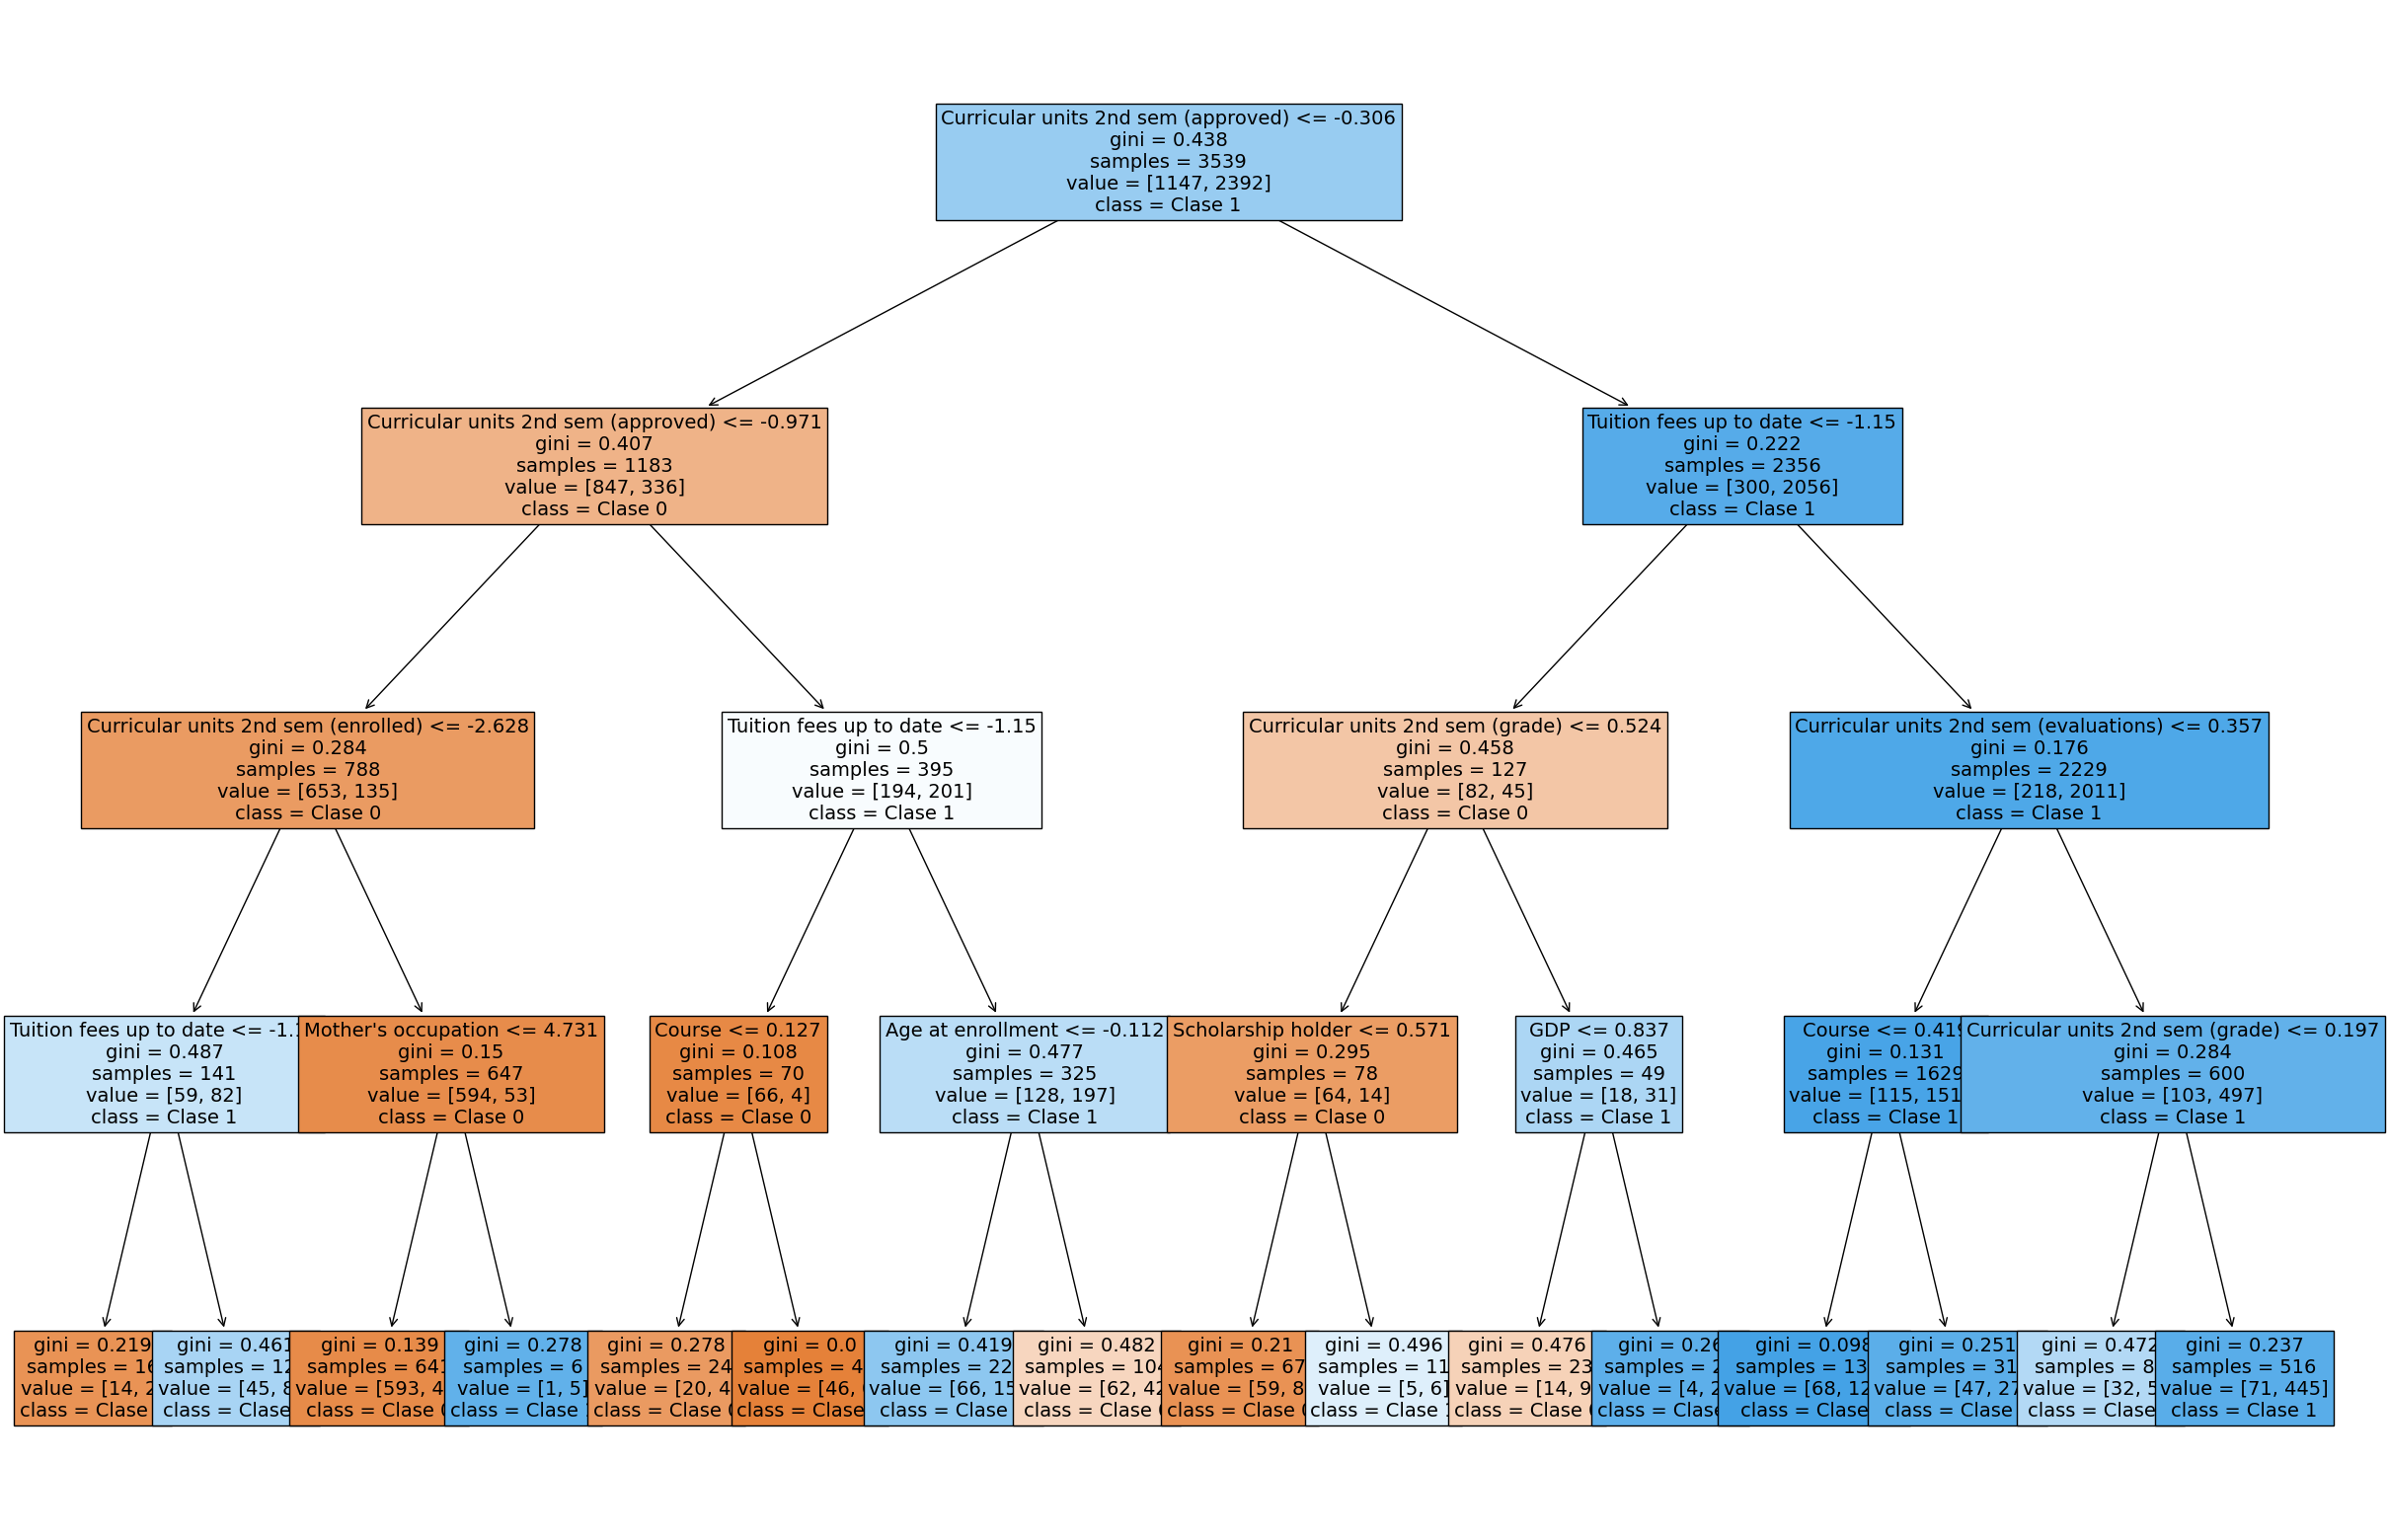

<Figure size 640x480 with 0 Axes>

In [14]:
# Visualizar el árbol de decisión
plt.figure(figsize=(30,20))
plot_tree(model, filled=True, feature_names=X.columns.tolist(), class_names=['Clase 0', 'Clase 1'], proportion=False, 
          impurity=True, 
          fontsize=14)
plt.show()
plt.savefig("arbol_decision.png")